In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
#Puxar as ações da B3, sempre necessário colcoar o ".sa" no final do papel. Também verificar se o Data Frame está correto

acoes = ['LIGT3.SA', 'BBAS3.SA', 'PETR4.SA', 'MGLU3.SA', 'VALE3.SA']
carteira = pd.DataFrame()
n = len(carteira)
rendimento = [1]
for i in acoes:
  carteira[i] = yf.download(i, period='1y')['Adj Close']
carteira
  
  
for i in range(n):
  ult_rend = rendimento[-1]
  rend_atual = 1.013 * ult_rend
  rendimento.append(ult_rend)
  carteira['simulado'] = rendimento[1:]
carteira



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,LIGT3.SA,BBAS3.SA,PETR4.SA,MGLU3.SA,VALE3.SA
Date,,,,,
2021-08-23,14.552797,27.581087,16.065607,18.129999,79.785645
2021-08-24,15.048916,28.482368,16.398573,19.240000,82.696739
2021-08-25,15.029460,28.389286,16.487759,19.549999,82.522575
2021-08-26,15.185104,27.989044,16.345060,18.799999,81.469276
2021-08-27,14.805720,28.417212,16.939642,19.030001,83.509537
...,...,...,...,...,...
2022-08-16,6.460000,42.988476,32.009998,4.150000,69.820000
2022-08-17,6.510000,42.600388,32.759998,4.020000,68.230003
2022-08-18,6.390000,41.615231,33.419998,4.030000,67.720001


In [5]:
df1 = pd.DataFrame()
M_inicial = 1
taxa = 0.00072955222

valores = []

for i in range(250): valores.append(valores[-1]*(1+taxa)if len(valores) > 0 else M_inicial * (1 + taxa))

df1['VarRF'] = valores
df1['VarRF']

0      1.000730
1      1.001460
2      1.002190
3      1.002921
4      1.003653
         ...   
245    1.196505
246    1.197377
247    1.198251
248    1.199125
249    1.200000
Name: VarRF, Length: 250, dtype: float64

In [6]:
carteira1 = carteira.assign(Debenture = valores )
carteira1

,LIGT3.SA,BBAS3.SA,PETR4.SA,MGLU3.SA,VALE3.SA,Debenture
Date,,,,,,
2021-08-23,14.552797,27.581087,16.065607,18.129999,79.785645,1.000730
2021-08-24,15.048916,28.482368,16.398573,19.240000,82.696739,1.001460
2021-08-25,15.029460,28.389286,16.487759,19.549999,82.522575,1.002190
2021-08-26,15.185104,27.989044,16.345060,18.799999,81.469276,1.002921
2021-08-27,14.805720,28.417212,16.939642,19.030001,83.509537,1.003653
...,...,...,...,...,...,...
2022-08-16,6.460000,42.988476,32.009998,4.150000,69.820000,1.196505
2022-08-17,6.510000,42.600388,32.759998,4.020000,68.230003,1.197377
2022-08-18,6.390000,41.615231,33.419998,4.030000,67.720001,1.198251


In [7]:
acoes1 = ['LIGT3.SA', 'BBAS3.SA', 'PETR4.SA', 'MGLU3.SA', 'VALE3.SA','Debenture' ]

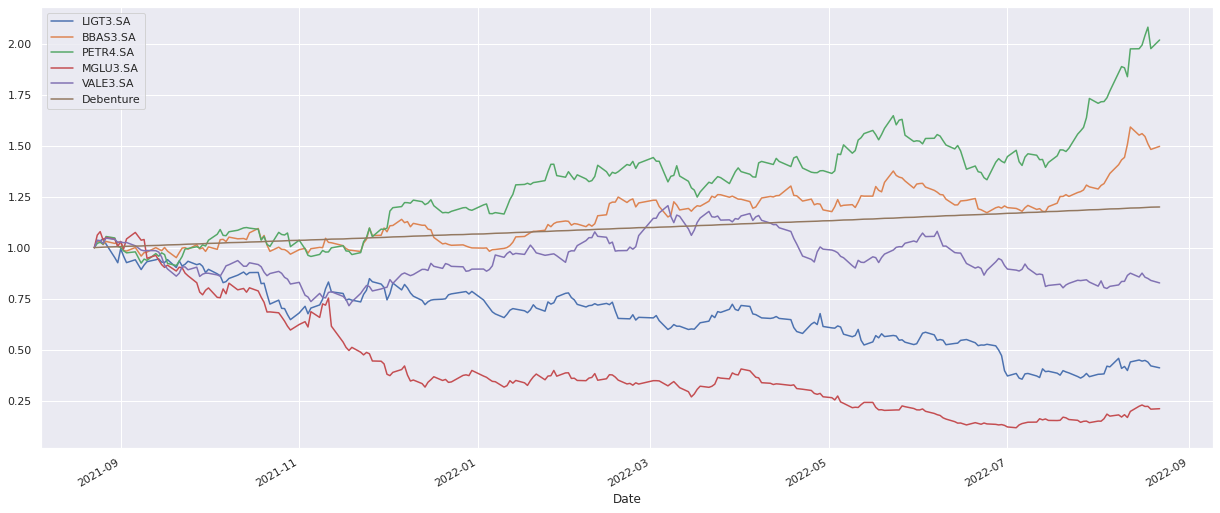

In [8]:
sns.set()
carteira_normalizada = carteira1/carteira1.iloc[0]
carteira_normalizada.plot(figsize=(21,9))

In [9]:
retorno = carteira1.pct_change()
retorno

,LIGT3.SA,BBAS3.SA,PETR4.SA,MGLU3.SA,VALE3.SA,Debenture
Date,,,,,,
2021-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,0.034091,0.032678,0.020725,0.061225,0.036486,0.00073
2021-08-25,-0.001293,-0.003268,0.005439,0.016112,-0.002106,0.00073
2021-08-26,0.010356,-0.014098,-0.008655,-0.038363,-0.012764,0.00073
2021-08-27,-0.024984,0.015298,0.036377,0.012234,0.025043,0.00073
...,...,...,...,...,...,...
2022-08-16,-0.012232,0.004885,0.009142,0.027228,0.022255,0.00073
2022-08-17,0.007740,-0.009028,0.023430,-0.031325,-0.022773,0.00073
2022-08-18,-0.018433,-0.023126,0.020147,0.002488,-0.007475,0.00073


In [10]:
#A média diária de retorno anual é multiplicada pela quantidade de DIAS ÚTEIS para ativos da B3

retorno_anual = retorno.mean() * 264
retorno_anual

LIGT3.SA    -0.762465
BBAS3.SA     0.473213
PETR4.SA     0.817634
MGLU3.SA    -1.306960
VALE3.SA    -0.128017
Debenture    0.192602
dtype: float64

In [11]:
cov = retorno.cov() * 264
cov

,LIGT3.SA,BBAS3.SA,PETR4.SA,MGLU3.SA,VALE3.SA,Debenture
LIGT3.SA,0.357401,0.064390,0.056976,0.189455,0.018387,0.0
BBAS3.SA,0.064390,0.092026,0.056413,0.062302,0.022728,0.0
PETR4.SA,0.056976,0.056413,0.145975,0.050079,0.045522,0.0
MGLU3.SA,0.189455,0.062302,0.050079,0.682871,0.032142,0.0
VALE3.SA,0.018387,0.022728,0.045522,0.032142,0.147354,0.0
Debenture,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [12]:
num_acoes = len(acoes1)
num_carteiras = 1000000

lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []

In [13]:
for carteira1 in range(num_carteiras):
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [14]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(acoes1):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes1]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,LIGT3.SA Peso,BBAS3.SA Peso,PETR4.SA Peso,MGLU3.SA Peso,VALE3.SA Peso,Debenture Peso
0,-0.380500,0.284727,-1.336368,0.204262,0.050077,0.010977,0.211476,0.255161,0.268046
1,0.159158,0.238857,0.666333,0.102551,0.325088,0.163327,0.018662,0.314464,0.075907
2,-0.168263,0.311434,-0.540285,0.013084,0.079839,0.222250,0.285538,0.254207,0.145082
3,-0.044510,0.320072,-0.139064,0.135532,0.337732,0.223551,0.212441,0.073607,0.017138
4,-0.129441,0.294662,-0.439284,0.120191,0.307061,0.113277,0.197200,0.213666,0.048606
...,...,...,...,...,...,...,...,...,...
999995,-0.062567,0.262320,-0.238514,0.129541,0.205198,0.063881,0.047252,0.493105,0.061022
999996,0.079724,0.267085,0.298499,0.281636,0.117209,0.311877,0.039378,0.039519,0.210382
999997,-0.009678,0.275135,-0.035174,0.002888,0.204226,0.220926,0.214192,0.229935,0.127833
999998,-0.305554,0.324537,-0.941507,0.193402,0.076307,0.149140,0.278471,0.032717,0.269964


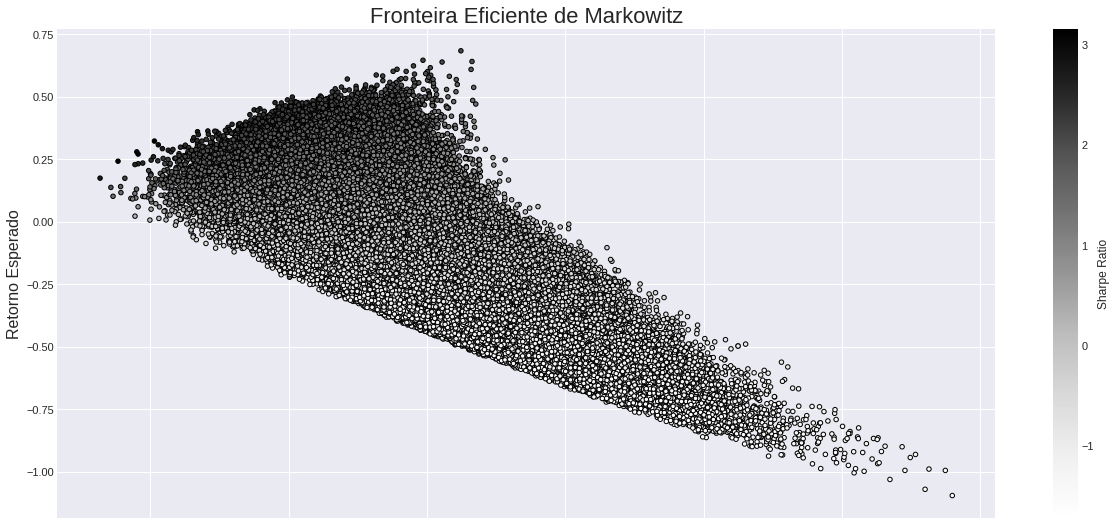

In [15]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black', figsize=(21,9), grid=True)
plt.xlabel('Volatilidade', fontsize=16)
plt.ylabel('Retorno Esperado', fontsize=16)
plt.title('Fronteira Eficiente de Markowitz', fontsize=22)
plt.savefig('Fronteira.png', dpi = 500)

AttributeError: ignored

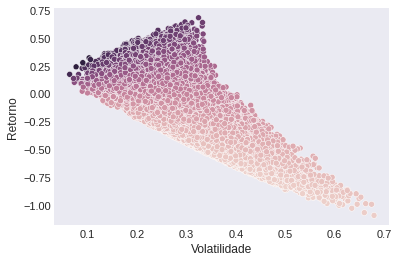

In [16]:
sns.scatterplot(x = 'Volatilidade', y = 'Retorno', hue = 'Sharpe Ratio', data = portfolios, legend=None)
sns.set_xticklabels('Volatilidade', fontsize = 16)
sns.set_yticklabels('Retorno Esperado', fontsize = 16)
sns.set_title('Fronteira Eficiente de Markowitz', fontsize = 22)

In [17]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

,364068
Retorno,0.174465
Volatilidade,0.063656
Sharpe Ratio,2.740739
LIGT3.SA Peso,0.022214
BBAS3.SA Peso,0.097708
PETR4.SA Peso,0.038117
MGLU3.SA Peso,0.017613
VALE3.SA Peso,0.067841
Debenture Peso,0.756508


In [18]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T

,315631
Retorno,0.242262
Volatilidade,0.076629
Sharpe Ratio,3.161486
LIGT3.SA Peso,0.030154
BBAS3.SA Peso,0.030481
PETR4.SA Peso,0.154327
MGLU3.SA Peso,0.016252
VALE3.SA Peso,0.006804
Debenture Peso,0.761981


In [20]:
maior_retorno = portfolios['Retorno'].max()
carteira_maior_retorno = portfolios.loc[portfolios['Retorno'] == maior_retorno]
carteira_maior_retorno.T

,874959
Retorno,0.684147
Volatilidade,0.324451
Sharpe Ratio,2.108633
LIGT3.SA Peso,0.021037
BBAS3.SA Peso,0.211267
PETR4.SA Peso,0.739914
MGLU3.SA Peso,0.005403
VALE3.SA Peso,0.006286
Debenture Peso,0.016094
